In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("C:/ML/python/data/Space_Corrected.csv",delimiter=',')

df.info()
df.isna().sum()
df.duplicated().sum()
df.dtypes
df['Rocket'] = df[' Rocket']
df.drop(' Rocket',axis=1,inplace=True)
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB
Unnamed: 0.1      4324
Unnamed: 0        4324
Company Name        56
Location           137
Datum             4319
Detail            4278
Status Rocket        2
Status Mission       4
Rocket              56
dtype: int64


Unnamed:_0.1       int64
Unnamed:_0         int64
Company_Name      object
Location          object
Datum             object
Detail            object
Status_Rocket     object
Status_Mission    object
Rocket            object
dtype: object


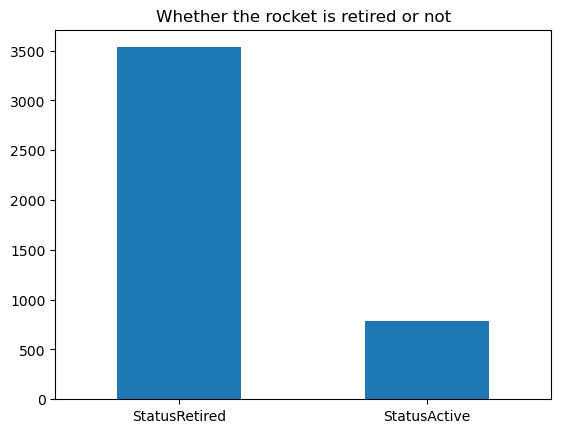

In [2]:
import numpy as np
df['Datum']


df['Rocket'] = df['Rocket'].fillna(method="ffill")



df.columns = df.columns.str.replace(" ","_")
print(df.dtypes)


df['Status_Rocket'].value_counts().plot(kind='bar',rot=0)
plt.title("Whether the rocket is retired or not")
plt.show()

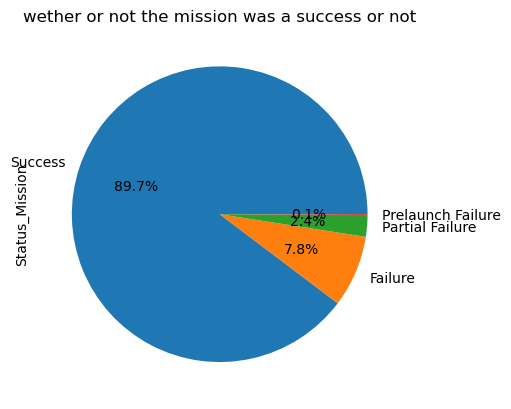

In [3]:
df['Status_Mission'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title("wether or not the mission was a success or not")
plt.show()

In [4]:
df['Status_Rocket'] = [1 if X == "StatusActive" else 0 for X in df['Status_Rocket']]
df['Status_Rocket'].head(10)
df['Status_Rocket'].value_counts()

0    3534
1     790
Name: Status_Rocket, dtype: int64

In [5]:
df.drop(["Unnamed:_0.1","Unnamed:_0"],inplace=True,axis=1)

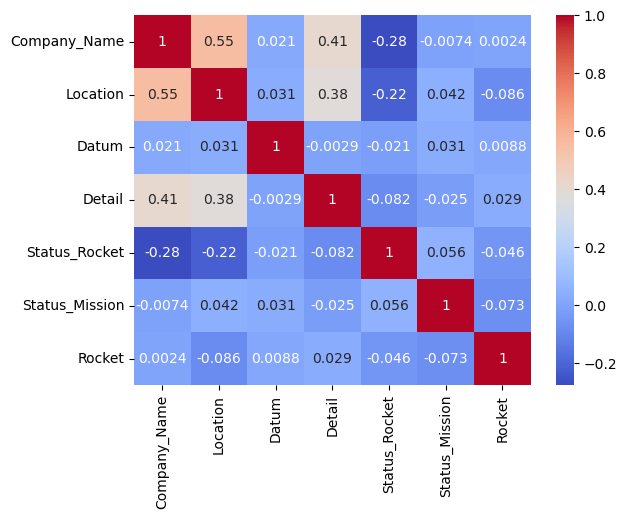

In [6]:
### converting the dataframe into a copy to use labelencoder to plot
### summary statistics

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy()


for i in df1:
    df1[i] = le.fit_transform(df1[i])


sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")
plt.show()


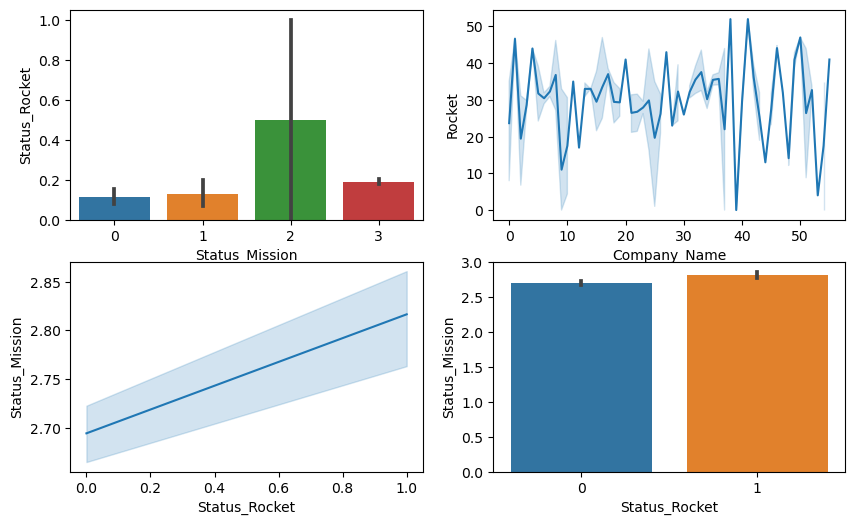

In [7]:
def desc_stats(df1):
    f,axs = plt.subplots(2,2,figsize=(10,6))
    sns.barplot(x='Status_Mission',y='Status_Rocket',data=df1,ax=axs[0,0])
    sns.lineplot(x='Company_Name',y='Rocket',data=df1,ax=axs[0,1])
    sns.lineplot(x='Status_Rocket',y='Status_Mission',data=df1,ax=axs[1,0])
    sns.barplot(x='Status_Rocket',y='Status_Mission',data=df1,ax=axs[1,1])
    plt.show()


desc_stats(df1)


In [8]:
## I will take it, whatever

X = df.drop(["Status_Rocket","Detail","Company_Name","Location","Datum"],axis=1)
y = df['Status_Rocket']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from sklearn.preprocessing import OneHotEncoder,StandardScaler

ohe = OneHotEncoder(sparse_output=True)
sc = StandardScaler()

from sklearn.compose import make_column_transformer


ct = make_column_transformer(
    (ohe,X.select_dtypes(include='object').columns),
    (sc,X.select_dtypes(include=['int64','float32']).columns),remainder='passthrough')

ct.fit_transform(X)


from sklearn.pipeline import make_pipeline




from sklearn.linear_model import LogisticRegression
lr=  LogisticRegression()



from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestClassifier

RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

def evaluate_model(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, pred)
    roc = roc_auc_score(y_test,pred_prob)
    print(f'{model.__class__.__name__}, --Accuracy Score-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    return pred,pred_prob

lr_pred,lr_pred_prob = evaluate_model(X_train,X_test,y_train,y_test,lr)
RFC_pred,RFC_pred_prob = evaluate_model(X_train,X_test,y_train,y_test,RFC)
GBC_pred,GBC_pred_prob = evaluate_model(X_train,X_test,y_train,y_test,GBC)
tree_pred,tree_pred_prob = evaluate_model(X_train,X_test,y_train,y_test,tree)


LogisticRegression, --Accuracy Score-- 92.95%; --ROC-- 96.77%
RandomForestClassifier, --Accuracy Score-- 92.60%; --ROC-- 96.71%
GradientBoostingClassifier, --Accuracy Score-- 92.37%; --ROC-- 96.40%
DecisionTreeClassifier, --Accuracy Score-- 92.95%; --ROC-- 96.25%


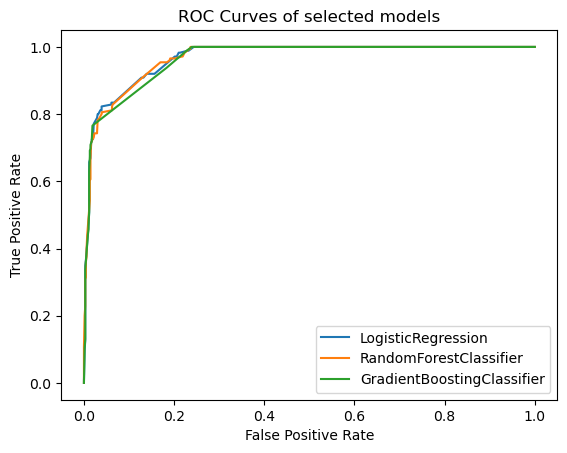

In [12]:
def ROC(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.title('ROC Curves of selected models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    

ROC(y_test,lr_pred_prob,lr)
ROC(y_test, RFC_pred_prob, RFC)
ROC(y_test,GBC_pred_prob,GBC)
plt.legend()
plt.show()

In [ ]:
#Bad
#just dumb
# LNOS > space